## Parte 3 del ejercicio 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

In [3]:
#Funcion que grafica una caja con puntos aeatorios

def caja_aleatoria(lado, Npuntos):
    #Coordenadas de los puntos
    X, Y = [lado * np.random.random() for i in range(Npuntos)], [lado * np.random.random() for i in range(Npuntos)]
    
    #Nos regresa los valores de las coordenadas de los puntos
    return X, Y

In [4]:
#Esta funcion genera los valores de bins para la distancia de puntos en una muestra

def hist_bins(tam_bins, lado, coord): #Tamaño de bins, tamaño de la caja, coordenadas de puntos
    X, Y = coord
    dist_max = np.sqrt(2) * lado #distancia maxima posile en la caja
    
    #Calculamos todas las distancias
    n = len(X)
    dist = [0 for i in range(int(n*(n-1)/2))]
    k = 0
    for i in range(n-1):
        for j in range(i+1, n):
            dist[k] = (np.sqrt((X[j]-X[i])**2 + (Y[j]-Y[i])**2))
            k += 1
    
    bins = np.arange(0, dist_max, tam_bins) #arreglo para los bins
    bins_val, bins_edges = np.histogram(dist, bins = bins) #Calculamos el histograma de las distancias 
    return dist, bins_val, bins_edges #Devolvemos el valor de los bins solamente

In [5]:
#Funcion que devuelve valores de bins para distancia entre puntos aleatorios y de los datos

def hist_DR(tam_bins, lado, coord_random, coord_data): #Numero de bins, coord. de puntos aleatorios, coord. de puntos de datos
    Xr, Yr = coord_random #Coordenadas de aleatorios
    Xd, Yd = coord_data #Coord. de datos
    dist_max = np.sqrt(2) * lado
    
    Nr = len(Xr) #Numero de puntos aleatorios
    Nd = len(Xd) #Numero de datos
    dist = [0 for i in range(Nd*Nr)]
    k = 0
    #Calculamos distancias
    for i in range(Nr):
        for j in range(Nd):
            dist[k] = (np.sqrt((Xd[j]-Xr[i])**2 + (Yd[j]-Yr[i])**2))
            k += 1
    
    bins = np.arange(0, dist_max, tam_bins)
    DR = np.histogram(dist, bins = bins)
    return DR[0]

In [6]:
#Peebles-Hauser
def estimador_PH(DD, RR, Nd, Nr):
    Nest2 = Nr*(Nr-1)/(Nd*(Nd-1)) 
    return 1/Nest2 * DD/RR - 1

In [7]:
#Davis-Peebles
def estimador_DP(DD, DR, Nd, Nr):
    Nest2 = Nr*(Nr-1)/(Nd*(Nd-1)) 
    return 1/np.sqrt(Nest2) * DD/DR - 1

In [8]:
#Hamilton
def estimador_H(DD, RR, DR):
    return DD*RR/DR**2

In [9]:
#Landy-Szalay
def estimador_LZ(DD, RR, DR, Nd, Nr):
    Nest2 = Nr*(Nr-1)/(Nd*(Nd-1)) 
    est = 1 + 1/Nest2 * DD/RR - 2/np.sqrt(Nest2) * DR/RR
    return est

### Malla

In [10]:
#Obtenemos datos de la malla
with open("malla.txt", "r") as malla:
    reader = csv.reader(malla, delimiter = "\t")
    coord_malla = list(zip(*reader))

#Convertimos datos a enteros
coord_malla[0] = list(map(int, coord_malla[0]))
coord_malla[1] = list(map(int, coord_malla[1]))

In [11]:
Nd_malla = len(coord_malla[0]) #Numero de datos
Nr_malla = 3 * Nd_malla #Numero de randoms
lado = 1000
tam_bins = 12.5 #Tamaño del bin

#Creamos muestra aleatoria
coord_random = caja_aleatoria(lado, Nr_malla)

In [12]:
dist_rndm, RR, bins_coord = hist_bins(tam_bins, lado, coord_random)
dist_malla, DD_malla, bins_coord = hist_bins(tam_bins, lado, coord_malla)
DR_malla = hist_DR(tam_bins, lado, coord_random, coord_malla)

bins_coord = bins_coord[:-1]

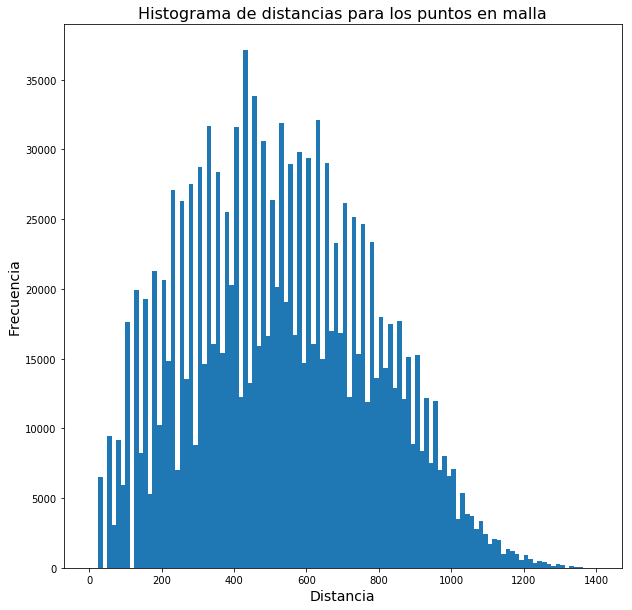

In [13]:
plt.hist(dist_malla, bins = bins_coord);
plt.title("Histograma de distancias para los puntos en malla", fontsize = 16);
plt.xlabel("Distancia", fontsize = 14)
plt.ylabel("Frecuencia", fontsize = 14);

In [14]:
#Calculamos los estimadores
PH_malla = estimador_PH(DD_malla, RR, Nd_malla, Nr_malla)
DP_malla = estimador_DP(DD_malla, DR_malla, Nd_malla, Nr_malla)
H_malla = estimador_H(DD_malla, RR, DR_malla)
LZ_malla = estimador_LZ(DD_malla, RR, DR_malla, Nd_malla, Nr_malla)

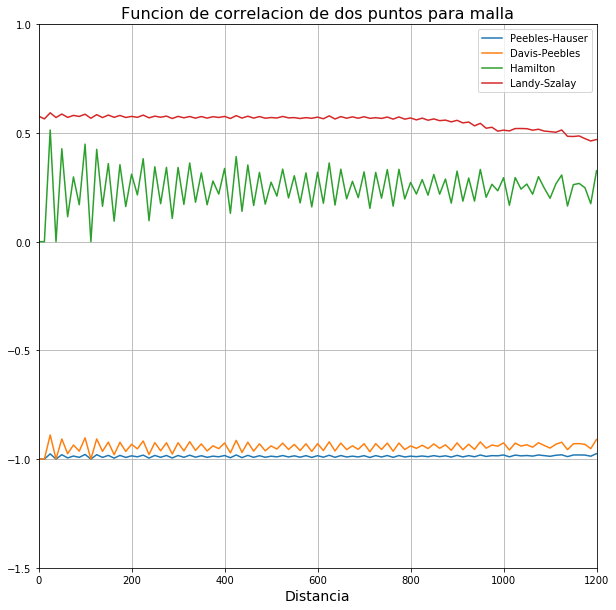

In [15]:
#Graficamos los estimadores
plt.plot(bins_coord, PH_malla, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_malla, label = "Davis-Peebles")
plt.plot(bins_coord, H_malla, label = "Hamilton")
plt.plot(bins_coord, LZ_malla, label = "Landy-Szalay")
plt.legend()
plt.ylim(-1.5,1);
plt.xlim(0,1200)
plt.title("Funcion de correlacion de dos puntos para malla", fontsize = 16)
plt.grid()
plt.xlabel("Distancia", fontsize = 14);

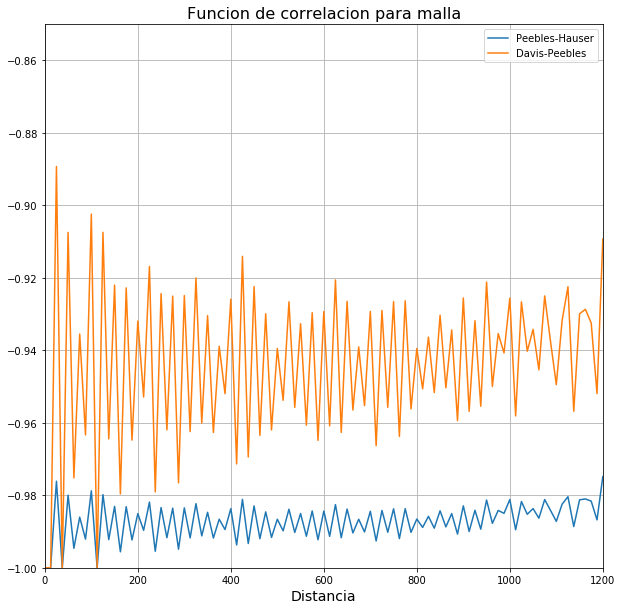

In [16]:
plt.plot(bins_coord, PH_malla, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_malla, label = "Davis-Peebles")
plt.legend()
plt.ylim(-1,-0.85)
plt.xlim(0,1200)
plt.title("Funcion de correlacion para malla", fontsize = 16)
plt.grid()
plt.xlabel("Distancia", fontsize = 14);

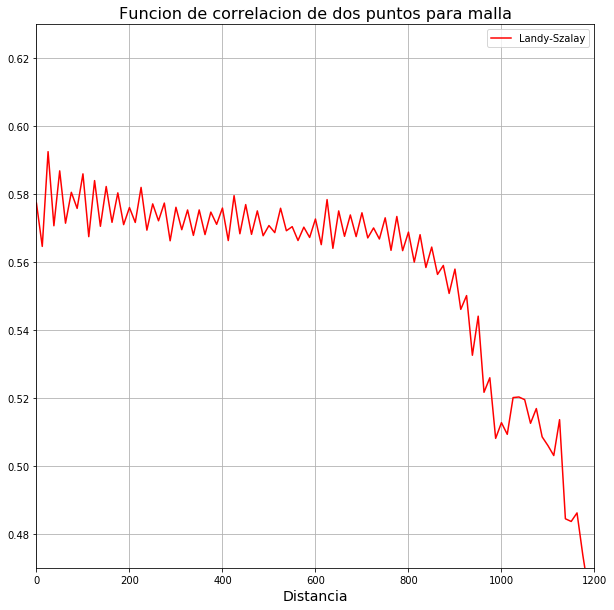

In [17]:
plt.plot(bins_coord, LZ_malla,"r", label = "Landy-Szalay")
plt.legend()
plt.ylim(0.47,0.63);
plt.xlim(0,1200)
plt.title("Funcion de correlacion de dos puntos para malla", fontsize = 16)
plt.grid()
plt.xlabel("Distancia", fontsize = 14);

Logran verse picos cada 25 unidades, que es la separacion de los puntos en la malla

## Disco

In [34]:
#Obtenemos datos del disco
with open("disco.txt", "r") as disco:
    reader = csv.reader(disco, delimiter = "\t")
    coord_disco = list(zip(*reader))

#Convertimos datos a enteros
coord_disco[0] = list(map(float, coord_disco[0]))
coord_disco[1] = list(map(float, coord_disco[1]))

In [41]:
Nd_disco = len(coord_disco[0]) #Numero de puntos en muestra aleatoria igual a los datos
Nr_disco = 3 * Nd_disco
lado = 1000
tam_bins = 10

#Creamos muestra aleatoria
coord_random = caja_aleatoria(lado, Nr_disco)

In [42]:
dist_rndm, RR, bins_coord = hist_bins(tam_bins, lado, coord_random) #Creamos RR
dist_disco, DD_disco, bins_coord = hist_bins(tam_bins, lado, coord_disco) #Creamos DD
DR_disco = hist_DR(tam_bins, lado, coord_random, coord_disco) #Creamos DR

bins_coord = bins_coord[:-1] #Eliminamos ultimo punto de los bins para igualar el tamaño de RR, DD, DR y bins_coord

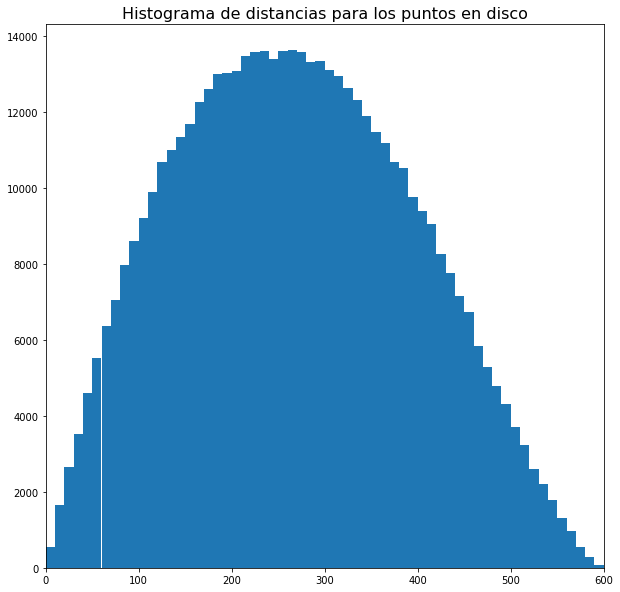

In [43]:
plt.hist(dist_disco, bins = bins_coord);
plt.title("Histograma de distancias para los puntos en disco", fontsize = 16);
plt.xlim(0, 600);

In [44]:
#Calculamos los estimadores
PH_disco = estimador_PH(DD_disco, RR, Nd_disco, Nr_disco)
DP_disco = estimador_DP(DD_disco, DR_disco, Nd_disco, Nr_disco)
H_disco = estimador_H(DD_disco, RR, DR_disco)
LZ_disco = estimador_LZ(DD_disco, RR, DR_disco, Nd_disco, Nr_disco)

/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


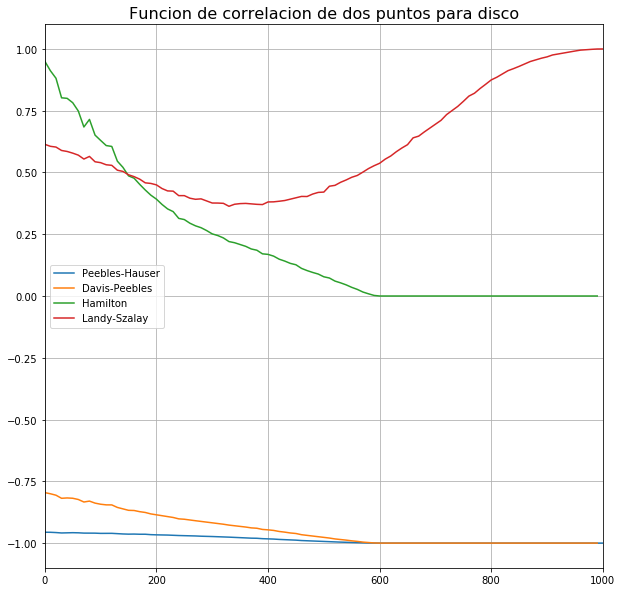

In [46]:
#Graficamos los estimadores
plt.plot(bins_coord, PH_disco, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_disco, label = "Davis-Peebles")
plt.plot(bins_coord, H_disco, label = "Hamilton")
plt.plot(bins_coord, LZ_disco, label = "Landy-Szalay")
plt.legend()
plt.xlim(0,1000);
plt.title("Funcion de correlacion de dos puntos para disco", fontsize = 16);
plt.grid()

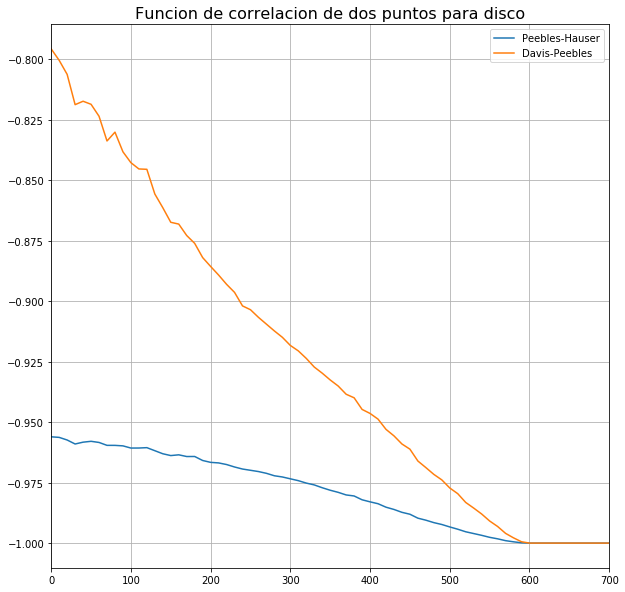

In [47]:
plt.plot(bins_coord, PH_disco, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_disco, label = "Davis-Peebles")
plt.legend()
plt.xlim(0,700);
plt.title("Funcion de correlacion de dos puntos para disco", fontsize = 16);
plt.grid()

Para todos los estimadores, excepto Landy-Szalay se nota una correlación en las distancias menores a 600, que es el diametro del disco.

## Anillo

In [48]:
#Obtenemos datos del anillo
with open("Anillo.txt", "r") as anillo:
    reader = csv.reader(anillo, delimiter = "\t")
    coord_anillo = list(zip(*reader))

#Convertimos datos a enteros
coord_anillo[0] = list(map(float, coord_anillo[0]))
coord_anillo[1] = list(map(float, coord_anillo[1]))

In [54]:
Nd_anillo = len(coord_anillo[0]) #Numero de puntos en muestra aleatoria igual a los datos
Nr_anillo = 3 * Nd_anillo
lado = 1000
tam_bins = 10

#Creamos muestra aleatoria
coord_random = caja_aleatoria(lado, Nr_anillo)

In [55]:
dist_rndm, RR, bins_coord = hist_bins(tam_bins, lado, coord_random) #Creamos RR
dist_anillo, DD_anillo, bins_coord = hist_bins(tam_bins, lado, coord_anillo) #Creamos DD
DR_anillo = hist_DR(tam_bins, lado, coord_random, coord_anillo) #Creamos DR

bins_coord = bins_coord[:-1] #Eliminamos ultimo punto de los bins para igualar el tamaño de RR, DD, DR y bins_coord

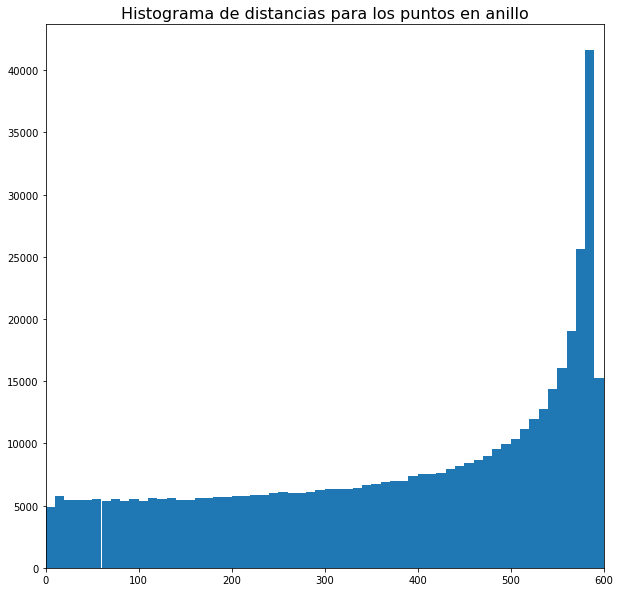

In [56]:
plt.hist(dist_anillo, bins = bins_coord);
plt.title("Histograma de distancias para los puntos en anillo", fontsize = 16);
plt.xlim(0, 600);

In [57]:
#Calculamos los estimadores
PH_anillo = estimador_PH(DD_anillo, RR, Nd_anillo, Nr_anillo)
DP_anillo = estimador_DP(DD_anillo, DR_anillo, Nd_anillo, Nr_anillo)
H_anillo = estimador_H(DD_anillo, RR, DR_anillo)
LZ_anillo = estimador_LZ(DD_anillo, RR, DR_anillo, Nd_anillo, Nr_anillo)

/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


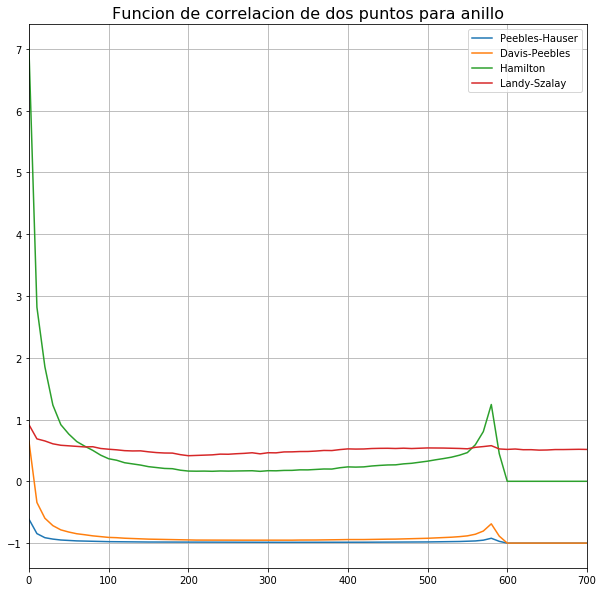

In [58]:
#Graficamos los estimadores
plt.plot(bins_coord, PH_anillo, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_anillo, label = "Davis-Peebles")
plt.plot(bins_coord, H_anillo, label = "Hamilton")
plt.plot(bins_coord, LZ_anillo, label = "Landy-Szalay")
plt.legend()
plt.xlim(0,700);
plt.title("Funcion de correlacion de dos puntos para anillo", fontsize = 16);
plt.grid()

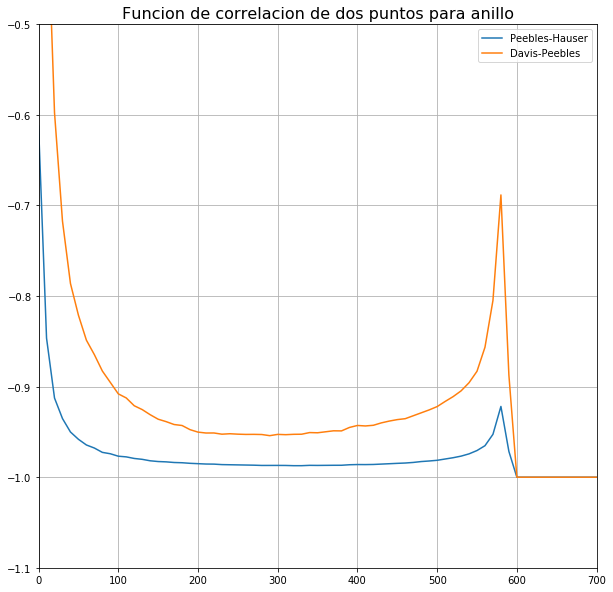

In [63]:
plt.plot(bins_coord, PH_anillo, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_anillo, label = "Davis-Peebles")
plt.legend()
plt.xlim(0,700);
plt.ylim(-1.1, -0.5)
plt.title("Funcion de correlacion de dos puntos para anillo", fontsize = 16);
plt.grid()

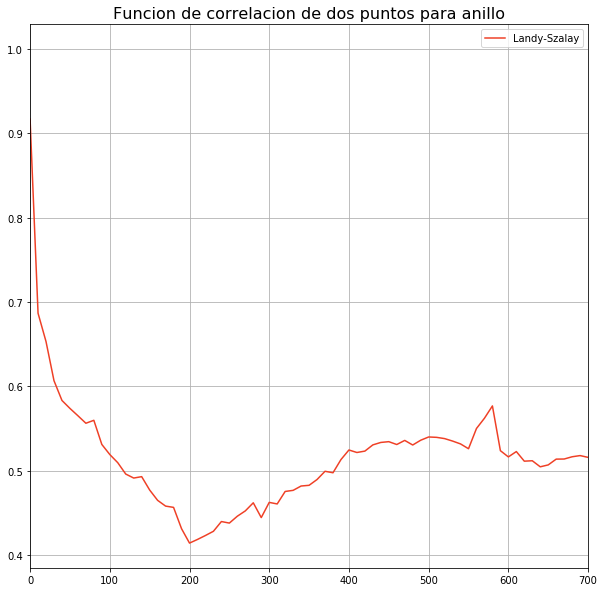

In [67]:
plt.plot(bins_coord, LZ_anillo,"xkcd:tomato", label = "Landy-Szalay")
plt.legend()
plt.xlim(0,700);
plt.title("Funcion de correlacion de dos puntos para anillo", fontsize = 16);
plt.grid()

Con todos los estimadores es clara la correlacion que existen en las distancias, excepto para Landy-Szalay

## Anillos

In [10]:
#Obtenemos datos del anillo
with open("anillosr.txt", "r") as anillos:
    reader = csv.reader(anillos, delimiter = "\t")
    coord_anillos = list(zip(*reader))

#Convertimos datos a enteros
coord_anillos[0] = list(map(float, coord_anillos[0]))
coord_anillos[1] = list(map(float, coord_anillos[1]))

In [11]:
Nd_anillos = len(coord_anillos[0]) #Numero de puntos en muestra aleatoria igual a los datos
Nr_anillos = Nd_anillos
lado = 1000
tam_bins = 10

#Creamos muestra aleatoria
coord_random = caja_aleatoria(lado, Nr_anillos)

In [12]:
dist_rndm, RR, bins_coord = hist_bins(tam_bins, lado, coord_random) #Creamos RR
dist_anillos, DD_anillos, bins_coord = hist_bins(tam_bins, lado, coord_anillos) #Creamos DD
DR_anillos = hist_DR(tam_bins, lado, coord_random, coord_anillos) #Creamos DR

bins_coord = bins_coord[:-1] #Eliminamos ultimo punto de los bins para igualar el tamaño de RR, DD, DR y bins_coord

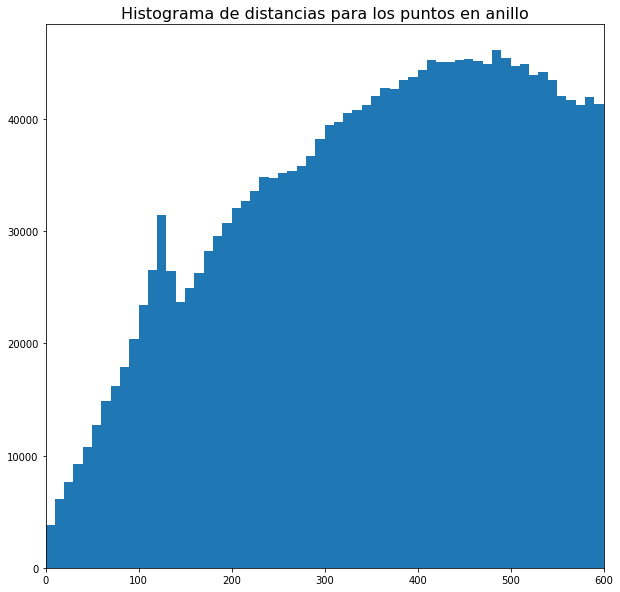

In [14]:
plt.hist(dist_anillos, bins = bins_coord);
plt.title("Histograma de distancias para los puntos en anillo", fontsize = 16);
plt.xlim(0, 600);

In [15]:
#Calculamos los estimadores
PH_anillos = estimador_PH(DD_anillos, RR, Nd_anillos, Nr_anillos)
DP_anillos = estimador_DP(DD_anillos, DR_anillos, Nd_anillos, Nr_anillos)
H_anillos = estimador_H(DD_anillos, RR, DR_anillos)
LZ_anillos = estimador_LZ(DD_anillos, RR, DR_anillos, Nd_anillos, Nr_anillos)

/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/chava/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


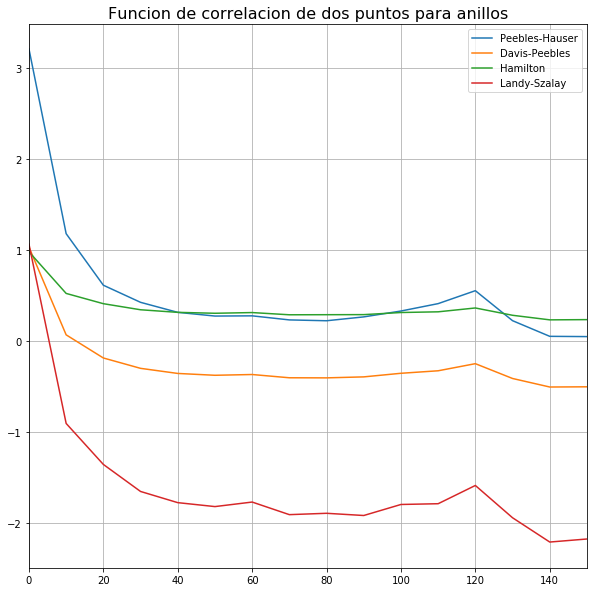

In [17]:
#Graficamos los estimadores
plt.plot(bins_coord, PH_anillos, label = "Peebles-Hauser")
plt.plot(bins_coord, DP_anillos, label = "Davis-Peebles")
plt.plot(bins_coord, H_anillos, label = "Hamilton")
plt.plot(bins_coord, LZ_anillos, label = "Landy-Szalay")
plt.legend()
plt.xlim(0,150);
plt.title("Funcion de correlacion de dos puntos para anillos", fontsize = 16);
plt.grid()